## Instacart Analysis - Visualisations Part1
1.	Import libraries, set directory paths & import data
2.	Check data frame dimensions, columns and datatypes
3.	Review of Customer Demographics
    (Includes single stacked bars, bar charts, line graphs, pie charts)
    -	Distribution of Age / Preferred shopping times / Preferred shopping day
    -	Distribution of Family Category / Contribution to revenue / Preferred shopping times
    -	Distribution of Income Category / Contribution to revenue / Preferred shopping times / Preferred shopping days
    -	Distribution of Gender / Contribution to revenue / Preferred shopping times
4.	Customer location by region
    -	Distribution of customers by Region / Regional contribution to revenue
5.	Customer demographics by region
    -	Age distribution by region
    -	Family category by region
    -	Income distribution by region
    -	Gender distribution by region

### import usual libraries plus visualisation tools

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import scipy

### set data set directory path

In [2]:
datasetpath = r'D:\My Documents\! Omnicompetent Ltd\Courses\Career Foundry - Data Analytics\Data Analytics Course\Instacart Basket Analysis\02 Data Sets'
datasetpath

'D:\\My Documents\\! Omnicompetent Ltd\\Courses\\Career Foundry - Data Analytics\\Data Analytics Course\\Instacart Basket Analysis\\02 Data Sets'

### set visualisation directory path

In [3]:
vizpath = r'D:\My Documents\! Omnicompetent Ltd\Courses\Career Foundry - Data Analytics\Data Analytics Course\Instacart Basket Analysis\04 Analysis'
vizpath

'D:\\My Documents\\! Omnicompetent Ltd\\Courses\\Career Foundry - Data Analytics\\Data Analytics Course\\Instacart Basket Analysis\\04 Analysis'

### import product and customer review dataset

In [4]:
df_review = pd.read_pickle(os.path.join(datasetpath,'testing_sample_prodcustkey.pkl'))

### review dimensions, columns & datatypes

In [6]:
df_review.shape

(9268148, 35)

In [7]:
df_review.dtypes

order_id                    int64
user_id                     int64
number_of_orders            int64
order_day_of_week           int64
order_hour_of_day           int64
days_since_prior_order    float64
product_id                  int64
reordered                   int64
product_name               object
department_id               int64
price                     float64
gender                     object
state                      object
age                         int64
n_dependants                int64
marital_status             object
income                      int64
region                     object
max_order                   int64
prod_price_range           object
sum_product_order           int64
top_order                 float64
product_revenue           float64
big_revenue               float64
key_dept                  float64
avg_order_days            float64
shop_freq                  object
avg_spend                 float64
spend_level                object
loyalty_flag  

# Review of Customer Demographics

## Distribution of Age

In [48]:
# age categories value counts
ages = df_review['age_flag'].value_counts()
ages

Grown-up    4362199
Chief       3164142
Snapper     1741807
Name: age_flag, dtype: int64

In [49]:
# reorder age categories
ages = ages.reindex(index = ['Snapper','Grown-up','Chief'])
ages

Snapper     1741807
Grown-up    4362199
Chief       3164142
Name: age_flag, dtype: int64

In [67]:
# age category labels
age_cate = ['Snapper','Grown-up','Chief']
age_cate

['Snapper', 'Grown-up', 'Chief']

In [51]:
# age value counts
age_count = ages.values
age_count

array([1741807, 4362199, 3164142], dtype=int64)

In [52]:
percent = age_count/age_count.sum()*100
percent

array([18.79347417, 47.06656605, 34.13995978])

In [53]:
cumulative = percent.cumsum()
cumulative

array([ 18.79347417,  65.86004022, 100.        ])

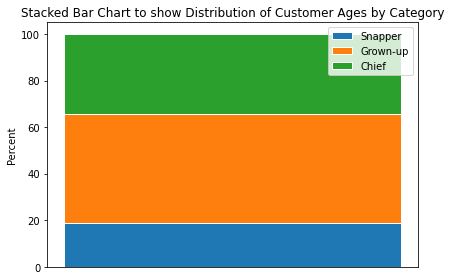

In [136]:
bar_age = plt.bar(0, percent[0], edgecolor='white', width=0.2)

# loop through each age_count value
for i in range(1, len(age_count)):
    plt.bar(0, percent[i], bottom=cumulative[i-1], edgecolor='white', width=0.2)

# bbox_to_anchor to avoid legend overlap
#plt.legend(age_cate, bbox_to_anchor=(1.05, 1))
plt.legend(age_cate)
plt.ylabel('Percent')

# switch off x-axis
frame1 = plt.gca()
frame1.axes.get_xaxis().set_visible(False)

plt.title('Stacked Bar Chart to show Distribution of Customer Ages by Category')

plt.show
plt.savefig(os.path.join(vizpath,'05 Stacked Bar Chart to show Distribution of Customer Ages by Category.png'))
plt.tight_layout()

#### ages 30 to 60 make up the largest age group

### contribution to revenue by age

In [7]:
rev_age = df_review.groupby(['age_flag']) ['price'].sum()
rev_age

age_flag
Chief       2.466815e+07
Grown-up    3.396229e+07
Snapper     1.355326e+07
Name: price, dtype: float64

In [10]:
rev_age_labels = ['Chief','Grown-up','Snapper']
rev_age_labels

['Chief', 'Grown-up', 'Snapper']

In [8]:
rev_age_values = rev_age.values
rev_age_values

array([24668147.40005957, 33962285.60008647, 13553256.78001262])

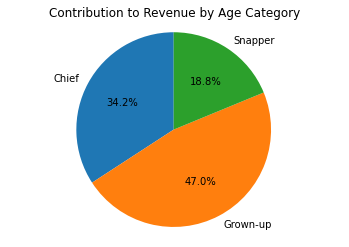

In [11]:
labels = rev_age_labels
sizes = rev_age_values
texts = plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Contribution to Revenue by Age Category')
plt.savefig(os.path.join(vizpath,'06 Contribution to Revenue by Age Category.png'))

### preferred shopping times for age categories

#### create sub groups for each age category

In [111]:
df_chief = df_review[df_review['age_flag']=='Chief']

In [115]:
df_grown = df_review[df_review['age_flag']=='Grown-up']

In [116]:
df_snapper = df_review[df_review['age_flag']=='Snapper']

In [113]:
df_chief.shape

(3164142, 35)

In [117]:
df_grown.shape

(4362199, 35)

In [118]:
df_snapper.shape

(1741807, 35)

### calculate mode ordering hours for each group

In [114]:
df_chief['order_hour_of_day'].mode()

0    10
dtype: int64

In [119]:
df_grown['order_hour_of_day'].mode()

0    10
dtype: int64

In [120]:
df_snapper['order_hour_of_day'].mode()

0    10
dtype: int64

### display this information as a bar chart for each age category

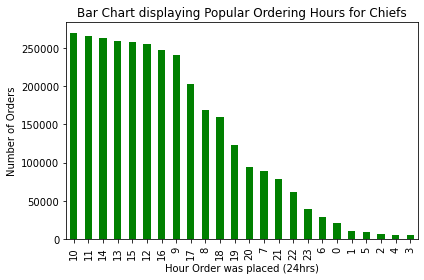

In [153]:
bar_hour_chief = df_chief['order_hour_of_day'].value_counts().plot.bar(color='green')
plt.title('Bar Chart displaying Popular Ordering Hours for Chiefs')
plt.xlabel('Hour Order was placed (24hrs)')
plt.ylabel('Number of Orders')
plt.tight_layout()

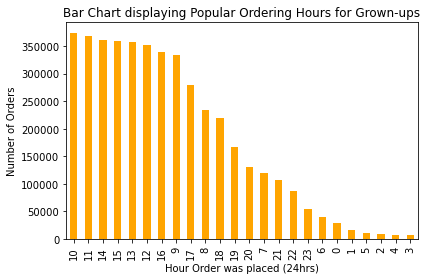

In [154]:
bar_hour_grown = df_grown['order_hour_of_day'].value_counts().plot.bar(color='orange')
plt.title('Bar Chart displaying Popular Ordering Hours for Grown-ups')
plt.xlabel('Hour Order was placed (24hrs)')
plt.ylabel('Number of Orders')
plt.tight_layout()

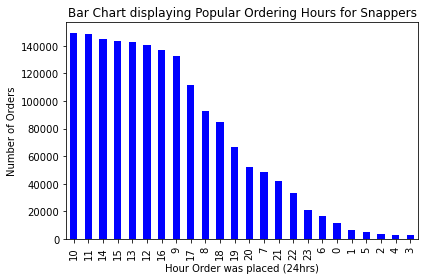

In [155]:
bar_hour_snapper = df_snapper['order_hour_of_day'].value_counts().plot.bar(color='blue')
plt.title('Bar Chart displaying Popular Ordering Hours for Snappers')
plt.xlabel('Hour Order was placed (24hrs)')
plt.ylabel('Number of Orders')
plt.tight_layout()

#### all age categories follow the same shopping times

### export vizs

In [156]:
bar_hour_chief.figure.savefig(os.path.join(vizpath,'07 Bar Chart displaying Popular Ordering Hours for Chief Age Category.png'))

In [157]:
bar_hour_grown.figure.savefig(os.path.join(vizpath,'08 Bar Chart displaying Popular Ordering Hours for Grown-up Age Category.png'))

In [158]:
bar_hour_snapper.figure.savefig(os.path.join(vizpath,'09 Bar Chart displaying Popular Ordering Hours for Snapper Age Category.png'))

### repeat for preferred shopping day

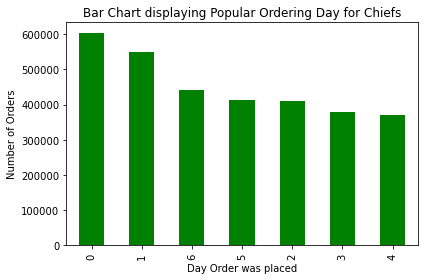

In [162]:
bar_day_chief = df_chief['order_day_of_week'].value_counts().plot.bar(color='green')
plt.title('Bar Chart displaying Popular Ordering Day for Chiefs')
plt.xlabel('Day Order was placed')
plt.ylabel('Number of Orders')
plt.tight_layout()

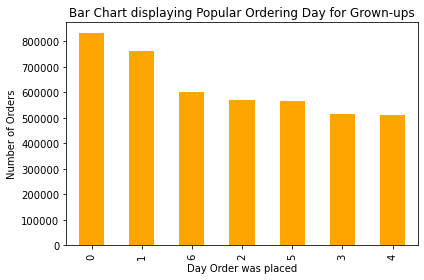

In [163]:
bar_day_grown = df_grown['order_day_of_week'].value_counts().plot.bar(color='orange')
plt.title('Bar Chart displaying Popular Ordering Day for Grown-ups')
plt.xlabel('Day Order was placed')
plt.ylabel('Number of Orders')
plt.tight_layout()

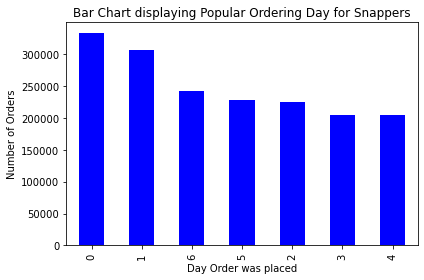

In [164]:
bar_day_snapper = df_snapper['order_day_of_week'].value_counts().plot.bar(color='blue')
plt.title('Bar Chart displaying Popular Ordering Day for Snappers')
plt.xlabel('Day Order was placed')
plt.ylabel('Number of Orders')
plt.tight_layout()

#### each age category follows the same pattern with a mild variation where grown-ups favour monday over friday but the other group favour friday over monday for shopping.

### export viz

In [165]:
bar_day_chief.figure.savefig(os.path.join(vizpath,'10 Bar Chart displaying Preferred Shopping Day for Chief Age Category.png'))

In [166]:
bar_day_grown.figure.savefig(os.path.join(vizpath,'11 Bar Chart displaying Preferred Shopping Day for Grown-up Age Category.png'))

In [167]:
bar_day_snapper.figure.savefig(os.path.join(vizpath,'12 Bar Chart displaying Preferred Shopping Day for Snapper Age Category.png'))

## Distribution of Family Category

### create single stacked bar chart with % on y-axis

In [7]:
# review value counts
family = df_review['family_flag'].value_counts()
family

busy           4496099
responsible    2456759
free           2315290
Name: family_flag, dtype: int64

In [8]:
# ensure outcome order
family = family.reindex(index=['free','responsible','busy'])
family

free           2315290
responsible    2456759
busy           4496099
Name: family_flag, dtype: int64

In [9]:
# seperate out the labels and the counts
fam_cate = ['Free','Responsible','Busy']
fam_cate

['Free', 'Responsible', 'Busy']

In [10]:
fam_count = family.values
fam_count

array([2315290, 2456759, 4496099], dtype=int64)

In [11]:
# calculate percent for each group
fam_percent = fam_count/fam_count.sum()*100
fam_percent

array([24.9811505 , 26.50755038, 48.51129913])

In [12]:
# set-up cumulative value counts
fam_cumul = fam_percent.cumsum()
fam_cumul

array([ 24.9811505 ,  51.48870087, 100.        ])

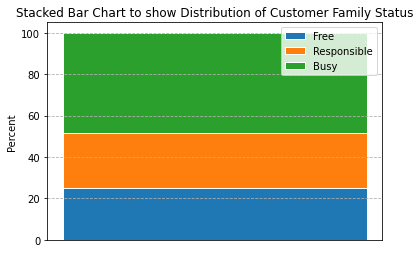

In [13]:
# create single stacked bar chart using the above settings
bar_family = plt.bar(0, fam_percent[0], edgecolor='white')

# loop through each age_count value
for i in range(1, len(fam_count)):
    plt.bar(0, fam_percent[i], bottom=fam_cumul[i-1], edgecolor='white')

plt.legend(fam_cate)
plt.ylabel('Percent')
plt.grid(True, linestyle='--')

# switch off x-axis
frame1 = plt.gca()
frame1.axes.get_xaxis().set_visible(False)

plt.title('Stacked Bar Chart to show Distribution of Customer Family Status')
#plt.tight_layout()
plt.show

plt.savefig(os.path.join(vizpath,'13 Stacked Bar Chart to show Distribution of Customer Family Status.png'))

### what is the contribution to revenue for each family category

In [14]:
total_rev = df_review['price'].sum()
total_rev

72183689.77999997

In [15]:
df_fam_rev = df_review.groupby(['family_flag'])['price'].transform(np.sum)

In [16]:
df_fam_rev.value_counts(dropna=False)

3.500831e+07    4496099
1.914553e+07    2456759
1.802986e+07    2315290
Name: price, dtype: int64

In [17]:
x = ['Busy','Responsible','Free']
x

['Busy', 'Responsible', 'Free']

In [18]:
y = [35008310,19145530,18029860]
y

[35008310, 19145530, 18029860]

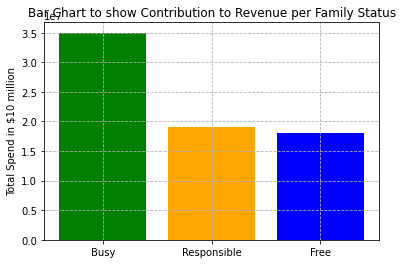

In [19]:
bar_fam_rev = plt.bar(x,y, color=['green','orange','blue'])
plt.title('Bar Chart to show Contribution to Revenue per Family Status')
plt.ylabel('Total Spend in $10 million')
plt.grid(True, linestyle='--')
plt.savefig(os.path.join(vizpath,'14 Bar Chart to show Contribution to Revenue per Family Status.png'))

In [20]:
df_busy = df_review[df_review['family_flag']=='busy']

In [21]:
df_response = df_review[df_review['family_flag']=='responsible']

In [22]:
df_free = df_review[df_review['family_flag']=='free']

In [24]:
df_busy.shape

(4496099, 35)

In [25]:
df_response.shape

(2456759, 35)

In [26]:
df_free.shape

(2315290, 35)

### calculate mode for preferred ordering hour for each family catgegory

In [27]:
df_busy['order_hour_of_day'].mode()

0    10
dtype: int64

In [28]:
df_response['order_hour_of_day'].mode()

0    10
dtype: int64

In [29]:
df_free['order_hour_of_day'].mode()

0    10
dtype: int64

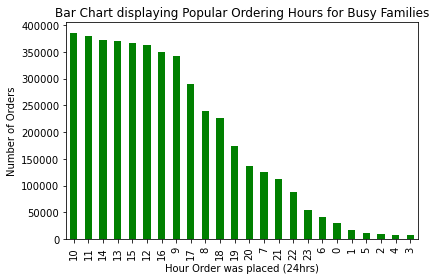

In [30]:
bar_hour_busy = df_busy['order_hour_of_day'].value_counts().plot.bar(color='green')
plt.title('Bar Chart displaying Popular Ordering Hours for Busy Families')
plt.xlabel('Hour Order was placed (24hrs)')
plt.ylabel('Number of Orders')
plt.tight_layout()

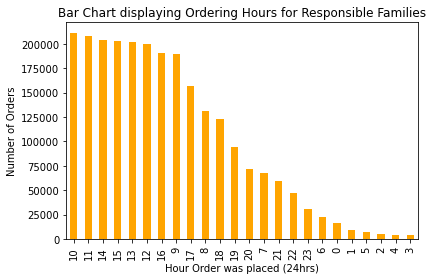

In [37]:
bar_hour_response = df_response['order_hour_of_day'].value_counts().plot.bar(color='orange')
plt.title('Bar Chart displaying Ordering Hours for Responsible Families')
plt.xlabel('Hour Order was placed (24hrs)')
plt.ylabel('Number of Orders')
plt.tight_layout()

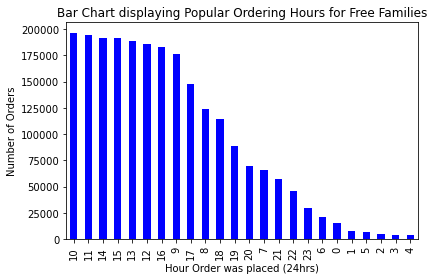

In [33]:
bar_hour_free = df_free['order_hour_of_day'].value_counts().plot.bar(color='blue')
plt.title('Bar Chart displaying Popular Ordering Hours for Free Families')
plt.xlabel('Hour Order was placed (24hrs)')
plt.ylabel('Number of Orders')
plt.tight_layout()

### export vizs

In [34]:
bar_hour_busy.figure.savefig(os.path.join(vizpath,'15 Bar Chart displaying Popular Ordering Hours for Busy Families.png'))

In [38]:
bar_hour_response.figure.savefig(os.path.join(vizpath,'16 Bar Chart displaying Popular Ordering Hours for Responsible Families.png'))

In [36]:
bar_hour_free.figure.savefig(os.path.join(vizpath,'17 Bar Chart displaying Popular Ordering Hours for Free Families.png'))

#### Family category does not have a bearing on the preferred shopping time.

## Distribution of Income Category

### create single stacked bar chart with % on y-axis

In [39]:
# review value counts
income = df_review['income_flag'].value_counts()
income

Standard    4504023
Under       2547949
Over        2216176
Name: income_flag, dtype: int64

In [40]:
# determine outcome order
income = income.reindex(index=['Over','Standard','Under'])
income

Over        2216176
Standard    4504023
Under       2547949
Name: income_flag, dtype: int64

In [41]:
# seperate out the labels and the counts
income_cate = ['Over','Standard','Under']
income_cate

['Over', 'Standard', 'Under']

In [43]:
income_count = income.values
income_count

array([2216176, 4504023, 2547949], dtype=int64)

In [44]:
# calculate percent for each group
income_percent = income_count/income_count.sum()*100
income_percent

array([23.91174591, 48.59679625, 27.49145784])

In [45]:
# set-up cumulative value counts
income_cumul = income_percent.cumsum()
income_cumul

array([ 23.91174591,  72.50854216, 100.        ])

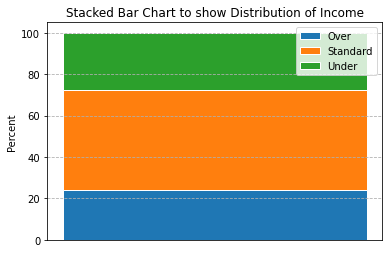

In [46]:
# create single stacked bar chart using the above settings
bar_income = plt.bar(0, income_percent[0], edgecolor='white')

# loop through each age_count value
for i in range(1, len(income_count)):
    plt.bar(0, income_percent[i], bottom=income_cumul[i-1], edgecolor='white')

plt.legend(income_cate)
plt.ylabel('Percent')
plt.grid(True, linestyle='--')

# switch off x-axis
frame1 = plt.gca()
frame1.axes.get_xaxis().set_visible(False)

plt.title('Stacked Bar Chart to show Distribution of Income')
#plt.tight_layout()
plt.show

plt.savefig(os.path.join(vizpath,'18 Stacked Bar Chart to show Distribution of Customer Income.png'))

### contribution to revenue per income category

In [47]:
df_income_rev = df_review.groupby(['income_flag'])['price'].transform(np.sum)

In [48]:
df_income_rev.value_counts(dropna=False)

3.583038e+07    4504023
1.874259e+07    2547949
1.761071e+07    2216176
Name: price, dtype: int64

In [49]:
x = ['Over','Standard','Under']
x

['Over', 'Standard', 'Under']

In [50]:
y = [17610710,35830380,18742590]
y

[17610710, 35830380, 18742590]

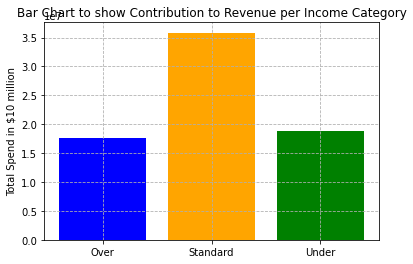

In [52]:
bar_income_rev = plt.bar(x,y, color=['blue','orange','green'])
plt.title('Bar Chart to show Contribution to Revenue per Income Category')
plt.ylabel('Total Spend in $10 million')
plt.grid(True, linestyle='--')
plt.savefig(os.path.join(vizpath,'19 Bar Chart to show Contribution to Revenue per Income Category.png'))

### create income sub sets

In [56]:
df_over = df_review[df_review['income_flag']=='Over']
df_over.shape

(2216176, 35)

In [57]:
df_stand = df_review[df_review['income_flag']=='Standard']
df_stand.shape

(4504023, 35)

In [58]:
df_under = df_review[df_review['income_flag']=='Under']
df_under.shape

(2547949, 35)

### calculate mode for preferred ordering hour & day for each income catgegory

In [59]:
df_over['order_hour_of_day'].mode()

0    10
dtype: int64

In [60]:
df_stand['order_hour_of_day'].mode()

0    11
dtype: int64

In [61]:
df_under['order_hour_of_day'].mode()

0    10
dtype: int64

In [62]:
df_over['order_day_of_week'].mode()

0    0
dtype: int64

In [63]:
df_stand['order_day_of_week'].mode()

0    0
dtype: int64

In [64]:
df_under['order_day_of_week'].mode()

0    1
dtype: int64

### display above mode information as graph - order hour

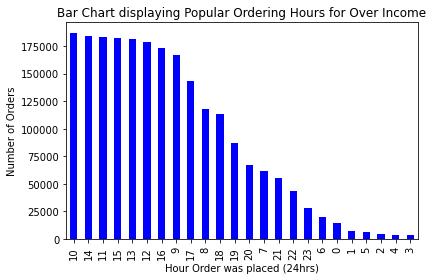

In [66]:
bar_hour_over = df_over['order_hour_of_day'].value_counts().plot.bar(color='blue')
plt.title('Bar Chart displaying Popular Ordering Hours for Over Income')
plt.xlabel('Hour Order was placed (24hrs)')
plt.ylabel('Number of Orders')
plt.tight_layout()

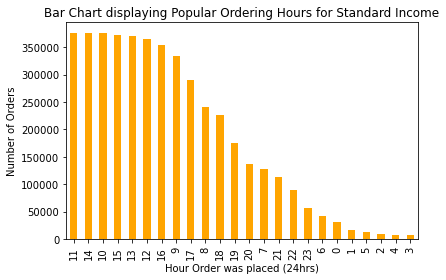

In [68]:
bar_hour_standard = df_stand['order_hour_of_day'].value_counts().plot.bar(color='orange')
plt.title('Bar Chart displaying Popular Ordering Hours for Standard Income')
plt.xlabel('Hour Order was placed (24hrs)')
plt.ylabel('Number of Orders')
plt.tight_layout()

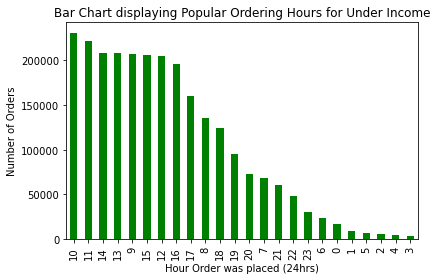

In [69]:
bar_hour_under = df_under['order_hour_of_day'].value_counts().plot.bar(color='green')
plt.title('Bar Chart displaying Popular Ordering Hours for Under Income')
plt.xlabel('Hour Order was placed (24hrs)')
plt.ylabel('Number of Orders')
plt.tight_layout()

### export vizs

In [70]:
bar_hour_over.figure.savefig(os.path.join(vizpath,'20 Bar Chart displaying Popular Ordering Hours for Over Income.png'))

In [71]:
bar_hour_standard.figure.savefig(os.path.join(vizpath,'21 Bar Chart displaying Popular Ordering Hours for Standard Income.png'))

In [72]:
bar_hour_under.figure.savefig(os.path.join(vizpath,'22 Bar Chart displaying Popular Ordering Hours for Under Income.png'))

### display above mode information as graph - order day

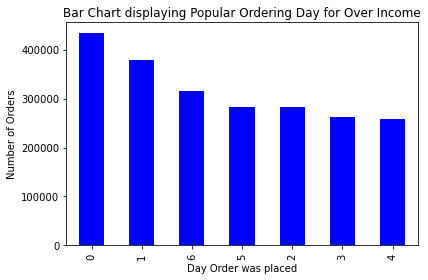

In [73]:
bar_day_over = df_over['order_day_of_week'].value_counts().plot.bar(color='blue')
plt.title('Bar Chart displaying Popular Ordering Day for Over Income')
plt.xlabel('Day Order was placed')
plt.ylabel('Number of Orders')
plt.tight_layout()

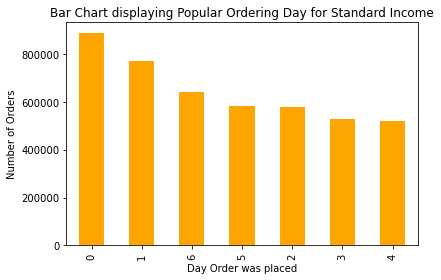

In [74]:
bar_day_stand = df_stand['order_day_of_week'].value_counts().plot.bar(color='orange')
plt.title('Bar Chart displaying Popular Ordering Day for Standard Income')
plt.xlabel('Day Order was placed')
plt.ylabel('Number of Orders')
plt.tight_layout()

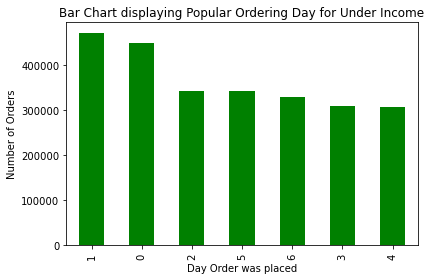

In [75]:
bar_day_under = df_under['order_day_of_week'].value_counts().plot.bar(color='green')
plt.title('Bar Chart displaying Popular Ordering Day for Under Income')
plt.xlabel('Day Order was placed')
plt.ylabel('Number of Orders')
plt.tight_layout()

### export vizs

In [76]:
bar_day_over.figure.savefig(os.path.join(vizpath,'23 Bar Chart displaying Popular Ordering Day for Over Income.png'))

In [77]:
bar_day_stand.figure.savefig(os.path.join(vizpath,'24 Bar Chart displaying Popular Ordering Day for Standard Income.png'))

In [78]:
bar_day_under.figure.savefig(os.path.join(vizpath,'25 Bar Chart displaying Popular Ordering Day for Under Income.png'))

## Distribution of Customer Gender 

In [80]:
df_review['gender'].value_counts()

Male      4666819
Female    4601329
Name: gender, dtype: int64

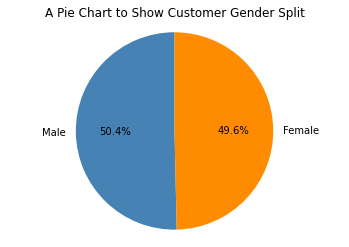

In [171]:
labels = ['Male','Female']
sizes = [4666819,4601329]
colors = ['steelblue','darkorange']
texts = plt.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('A Pie Chart to Show Customer Gender Split')
plt.savefig(os.path.join(vizpath,'26 Pie Chart to show Customer Gender Split.png'))

### gender revenue generation

In [136]:
rev_gender = df_review.groupby(['gender'])['price'].transform(np.sum)

In [143]:
gender_rev = rev_gender.value_counts(dropna=False)

In [144]:
gender_rev

3.635527e+07    4666819
3.582842e+07    4601329
Name: price, dtype: int64

### display revenue distrbution as single stacked bar chart in %

In [138]:
# define labels & values
gender_cate = ['Male','Female']
gender_cate

['Male', 'Female']

In [146]:
#gender_count = [36355270,35828420]
gender_count = gender_rev.values
gender_count

array([4666819, 4601329], dtype=int64)

In [147]:
# define as a %
gender_percent = gender_count/gender_count.sum()*100
gender_percent

array([50.35330683, 49.64669317])

In [148]:
# set-up cumulative frequency
gender_cum = gender_percent.cumsum()
gender_cum

array([ 50.35330683, 100.        ])

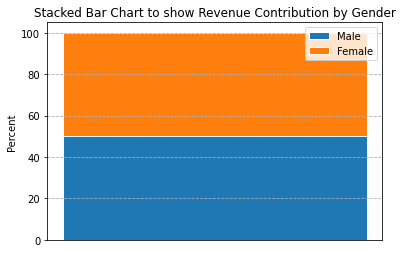

In [155]:
bar_gender = plt.bar(0, gender_percent[0], edgecolor='white', width=0.2)

# loop through each age_count value
for i in range(1, len(gender_count)):
    plt.bar(0, gender_percent[i], bottom=gender_cum[i-1], edgecolor='white', width=0.2)

# bbox_to_anchor to avoid legend overlap
#plt.legend(age_cate, bbox_to_anchor=(1.05, 1))
plt.legend(gender_cate)
plt.ylabel('Percent')

# switch off x-axis
frame1 = plt.gca()
frame1.axes.get_xaxis().set_visible(False)

plt.title('Stacked Bar Chart to show Revenue Contribution by Gender')
plt.grid(True, linestyle='--')

plt.show
plt.savefig(os.path.join(vizpath,'27 Stacked Bar Chart to show Revenue Contribution by Gender.png'))
#plt.tight_layout()

### gender preferred shopping times as stacked bar chart

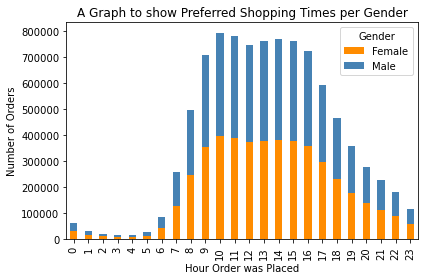

In [174]:
df_hour_gender = df_review.groupby(['order_hour_of_day', 'gender'])['order_hour_of_day'].count().unstack('gender').fillna(0)
df_hour_gender.plot.bar(stacked=True, color=['darkorange','steelblue'])

plt.title('A Graph to show Preferred Shopping Times per Gender')
plt.xlabel('Hour Order was Placed')
plt.ylabel('Number of Orders')
plt.legend(title='Gender')
plt.tight_layout()

plt.savefig(os.path.join(vizpath,'28 Stacked Bar Chart to Preferred Shopping Times by Gender.png'))

## Customer Location by Region

### distribution of customers

In [89]:
cust_region = df_review.groupby(['region']) ['user_id'].count()
cust_region

region
Midwest      2172517
Northeast    1634057
South        3087497
West         2374077
Name: user_id, dtype: int64

In [9]:
# define print order
cust_region = cust_region.reindex(index = ['South','West','Midwest','Northeast'])
cust_region

region
South        3087497
West         2374077
Midwest      2172517
Northeast    1634057
Name: order_id, dtype: int64

In [12]:
cust_region_labels = ['South','West','Midwest','Northeast']
cust_region_labels

['South', 'West', 'Midwest', 'Northeast']

In [13]:
cust_region_values = cust_region.values
cust_region_values

array([3087497, 2374077, 2172517, 1634057], dtype=int64)

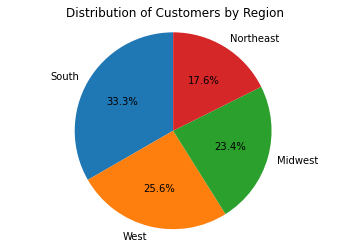

In [14]:
labels = cust_region_labels
sizes = cust_region_values
texts = plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribution of Customers by Region')
plt.savefig(os.path.join(vizpath,'29 Distribution of Customers by Region.png'))

### regional contribution to revenue

In [16]:
region_rev = df_review.groupby(['region']) ['price'].sum()
region_rev

region
Midwest      1.692529e+07
Northeast    1.270868e+07
South        2.406508e+07
West         1.848464e+07
Name: price, dtype: float64

In [17]:
# define print order
region_rev = region_rev.reindex(index = ['South','West','Midwest','Northeast'])
region_rev

region
South        2.406508e+07
West         1.848464e+07
Midwest      1.692529e+07
Northeast    1.270868e+07
Name: price, dtype: float64

In [18]:
region_rev_labels = ['South','West','Midwest','Northeast']
region_rev_labels

['South', 'West', 'Midwest', 'Northeast']

In [19]:
region_rev_values = region_rev.values
region_rev_values

array([24065082.50005601, 18484636.40003416, 16925291.8200273 ,
       12708679.06000943])

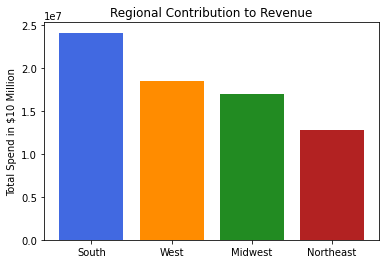

In [39]:
bar_region_rev = plt.bar(region_rev_labels,region_rev_values, color=['royalblue','darkorange','forestgreen','firebrick',])

plt.title('Regional Contribution to Revenue')
plt.ylabel('Total Spend in $10 Million')

plt.savefig(os.path.join(vizpath,'30 Regional Contribution to Revenue.png'))

In [25]:
# confirm percentage split of revenue matched % split of customer distbution.
cross_region_rev = pd.crosstab(df_review['price'], df_review['region'], dropna=False)
cross_region_rev.to_clipboard()

# Customer demographics by Region

## Age Distribution by Regions

In [60]:
region_age = df_review.groupby(['age_flag', 'region']) ['region'].count().unstack('age_flag')
region_age.value_counts()

Chief    Grown-up  Snapper
562936   764505    306616     1
734365   1031852   406300     1
812504   1119708   441865     1
1054337  1446134   587026     1
dtype: int64

In [61]:
region_age.to_clipboard()

### age distribution overall

In [90]:
age_cate = df_review.groupby(['age_flag']) ['user_id'].count()
age_cate

age_flag
Chief       3164142
Grown-up    4362199
Snapper     1741807
Name: user_id, dtype: int64

In [67]:
age_labels = ['Chief','Grown-up','Snapper']
age_labels

['Chief', 'Grown-up', 'Snapper']

In [68]:
age_values = age_cate.values
age_values

array([3164142, 4362199, 1741807], dtype=int64)

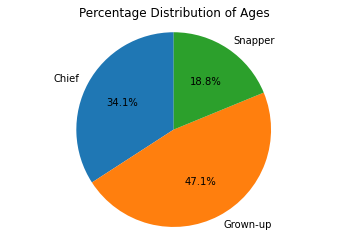

In [70]:
labels = age_labels
sizes = age_values
texts = plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Percentage Distribution of Ages')
plt.savefig(os.path.join(vizpath,'31 Percentage Distribution of Ages.png'))

### ages per region

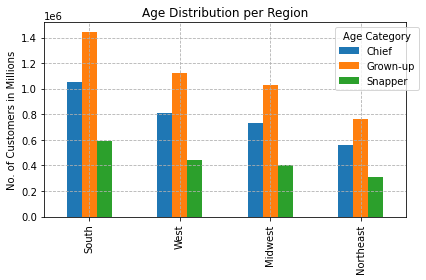

In [83]:
region_age = df_review.groupby(['age_flag', 'region']) ['region'].count().unstack('age_flag')
region_age = region_age.reindex(index=['South','West','Midwest','Northeast'])
region_age.plot.bar(stacked=False)

plt.title('Age Distribution per Region')
plt.xlabel('')
plt.ylabel('No. of Customers in Millions')
plt.legend(title='Age Category', bbox_to_anchor=(1.05, 1))
plt.grid(True, linestyle='--')
plt.tight_layout()

plt.savefig(os.path.join(vizpath,'32 Age Distribution per Region.png'))

## Family Distribution per Region

### family distribution overall

In [72]:
family_cate = df_review.groupby(['family_flag']) ['order_id'].count()
family_cate

family_flag
busy           4496099
free           2315290
responsible    2456759
Name: order_id, dtype: int64

In [73]:
# reorder
family_cate = family_cate.reindex(index=['busy','responsible','free'])
family_cate

family_flag
busy           4496099
responsible    2456759
free           2315290
Name: order_id, dtype: int64

In [74]:
family_labels = ['Busy','Responsible','Free']
family_labels

['Busy', 'Responsible', 'Free']

In [75]:
family_values = family_cate.values
family_values

array([4496099, 2456759, 2315290], dtype=int64)

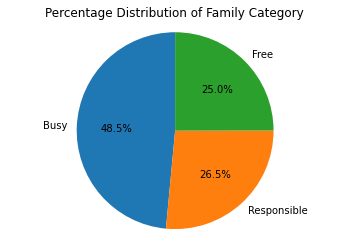

In [76]:
labels = family_labels
sizes = family_values
texts = plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Percentage Distribution of Family Category')
plt.savefig(os.path.join(vizpath,'33 Percentage Distribution of Family Category.png'))

### family category per region

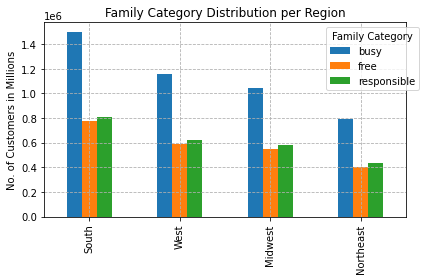

In [86]:
region_family = df_review.groupby(['family_flag', 'region']) ['region'].count().unstack('family_flag')
region_family = region_family.reindex(index=['South','West','Midwest','Northeast'])
region_family.plot.bar(stacked=False)

plt.title('Family Category Distribution per Region')
plt.xlabel('')
plt.ylabel('No. of Customers in Millions')
plt.legend(title='Family Category', bbox_to_anchor=(1.05, 1))
plt.grid(True, linestyle='--')
plt.tight_layout()

plt.savefig(os.path.join(vizpath,'34 Family Category Distribution per Region.png'))

### send values to clipboard for % distrbution review

In [81]:
region_family = df_review.groupby(['family_flag', 'region']) ['region'].count().unstack('family_flag')
region_family.value_counts()

busy     free    responsible
793430   404963  435664         1
1042534  545297  584686         1
1157981  592459  623637         1
1502154  772571  812772         1
dtype: int64

In [82]:
region_family.to_clipboard()

## Income Distribution per Region

### income distribution overall

In [92]:
income_cate = df_review.groupby(['income_flag']) ['user_id'].count()
income_cate

income_flag
Over        2216176
Standard    4504023
Under       2547949
Name: user_id, dtype: int64

In [93]:
income_labels = ['Over','Standard','Under']
income_labels

['Over', 'Standard', 'Under']

In [94]:
income_values = income_cate.values
income_values

array([2216176, 4504023, 2547949], dtype=int64)

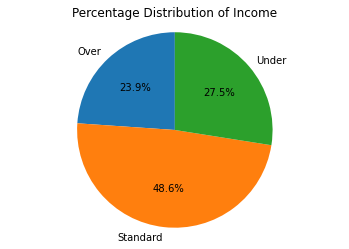

In [95]:
labels = income_labels
sizes = income_values
texts = plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Percentage Distribution of Income')
plt.savefig(os.path.join(vizpath,'35 Percentage Distribution of Income.png'))

### income category per region

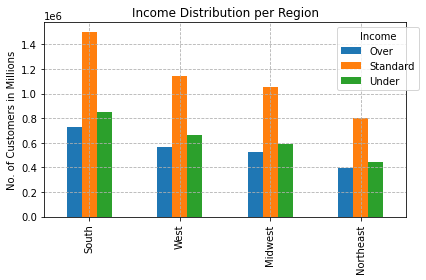

In [100]:
income_family = df_review.groupby(['income_flag', 'region']) ['region'].count().unstack('income_flag')
income_family = region_income.reindex(index=['South','West','Midwest','Northeast'])
income_family.plot.bar(stacked=False)

plt.title('Income Distribution per Region')
plt.xlabel('')
plt.ylabel('No. of Customers in Millions')
plt.legend(title='Income', bbox_to_anchor=(1.05, 1))
plt.grid(True, linestyle='--')
plt.tight_layout()

plt.savefig(os.path.join(vizpath,'36 Income Distribution per Region.png'))

### send values to clipboard for % review

In [97]:
region_income = df_review.groupby(['income_flag', 'region']) ['region'].count().unstack('income_flag')
region_income.value_counts()

Over    Standard  Under 
390964  799136    443957    1
527518  1054646   590353    1
566327  1146544   661206    1
731367  1503697   852433    1
dtype: int64

In [98]:
region_income.to_clipboard()

## Gender Distribution per Region

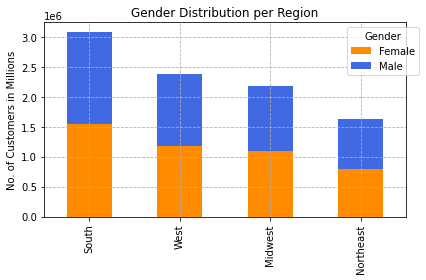

In [9]:
region_gender = df_review.groupby(['gender', 'region']) ['region'].count().unstack('gender')
region_gender = region_gender.reindex(index=['South','West','Midwest','Northeast'])
region_gender.plot.bar(stacked=True, color=['darkorange','royalblue'])

plt.title('Gender Distribution per Region')
plt.xlabel('')
plt.ylabel('No. of Customers in Millions')
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1))
plt.grid(True, linestyle='--')
plt.tight_layout()

plt.savefig(os.path.join(vizpath,'37 Gender Distribution per Region.png'))